# Notebook for analyzing twitter data from hurricane sandy.

The twitter dataset is from mdredze.

In [1]:
%matplotlib inline
import sys
import os
sys.path.append(os.path.abspath('../'))

import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

import twitterinfrastructure.twitter_sandy as ts
import importlib
importlib.reload(ts)

# os.chdir('../')
print(os.getcwd())

C:\dev\research\socialsensing\notebooks


## Create NYC Sandy analysis collection.

The analysis collection only includes tweets geolocated within the NYC taxi_zones shapefile and adds location_id, borogough_id, timestamp, and tokens fields.

In [2]:
# creates collection of processed tweets within NYC taxi_zones shapefile
# (635431 tweets out of 4799665, 649.7 MB total doc size)
# takes ~3 hours
collection = 'tweets_analysis'
tweet_collection = 'tweets'
nyisozones_collection = 'nyiso_zones'
taxizones_collection = 'taxi_zones'
fields = ['_id', 'coordinates', 'created_at', 'entities', 'text', 
          'id_str', 'place']
db_name = 'sandy'
db_instance = 'mongodb://localhost:27017/'

import_num, tokens = ts.create_analysis(collection=collection, 
                                        tweet_collection=tweet_collection,
                                        nyisozones_collection=nyisozones_collection,
                                        taxizones_collection=taxizones_collection, 
                                        fields=fields, db_name=db_name, 
                                        db_instance=db_instance, 
                                        progressbar=False,
                                        overwrite=True, verbose=1)

2018-07-23 11:51:43 : Started querying, processing, and inserting tweets from tweets into tweets_analysis collection in sandy database.

2018-07-23 11:51:43 : Dropped tweets_analysis collection (if exists).

2018-07-23 14:49:21 : Finished querying, processing, and inserting tweets from tweets into tweets_analysis collection in sandy database (635431 of 4745579 queried tweets inserted).



## Create Sandy, traffic, metro, and power-related collections of tweets.

Each collection only includes tweets related to that topic, based on keywords and hashtags.

In [3]:
# test tokens
tweet_text = 'hurricane sandy storm cab congestion nyctlc taxi traffic yellow ' \
             'blackout electricity grid lights nyiso outage power service ' \
             'bus metro mta mtasubway nycmta nycsubway sub subway train'
tokens = ts.tokenize_tweet(tweet_text)
print(tokens)

['hurrican', 'sandi', 'storm', 'cab', 'congest', 'nyctlc', 'taxi', 'traffic', 'yellow', 'blackout', 'electr', 'grid', 'light', 'nyiso', 'outag', 'power', 'servic', 'bu', 'metro', 'mta', 'mtasubway', 'nycmta', 'nycsubway', 'sub', 'subway', 'train']


In [4]:
# creates collection of Sandy-related tweets within NYC taxi_zones shapefile
# (30290 tweets with upper and lower-cap hashtags)
# takes ~1 mins (3.1 GHz Intel Core i7, 16 GB 1867 MHz DDR3)
tokens = ['hurrican', 'hurricane', 'sandi', 'sandy', 'storm']
hashtags = ['Sandy', 'sandy', 'HurricaneSandy', 'hurricanesandy',
            'Hurricanesandy', 'hurricaneSandy',
            'njsandy', 'NJSandy', 'NJsandy', 'njSandy',
            'MASandy', 'StormDE', 'SandyDC', 'rigov']
import_num = ts.create_tweets_keyword(tokens, hashtags, 
                                      collection='tweets_sandy', 
                                      analysis_collection='tweets_analysis', 
                                      db_name='sandy', 
                                      db_instance='mongodb://localhost:27017/', 
                                      overwrite=True, verbose=1)


2018-07-23 19:20:57 : Started querying and inserting token and/or hashtag-matched tweets from tweets_analysis into tweets_sandy collection in sandy database.

2018-07-23 19:20:57 : Dropped tweets_sandy collection (if exists).

2018-07-23 19:21:12 : Finished querying and inserting token and/or hashtag-matched tweets from tweets_analysis into tweets_sandy collection in sandy database. (30290 of 30290 queried tweets inserted).



In [5]:
# creates collection of traffic-related tweets within NYC taxi_zones shapefile
# (1364 tweets with ['cab', 'congest', 'nyctlc', 'taxi', 'traffic', 
# 'yellow'], ['taxi', 'Taxi', 'traffic', 'Traffic'])
# takes ~1 mins (3.1 GHz Intel Core i7, 16 GB 1867 MHz DDR3)
tokens = ['cab', 'congest', 'nyctlc', 'taxi', 'traffic', 'yellow']
hashtags = ['taxi', 'Taxi', 'traffic', 'Traffic']
import_num = ts.create_tweets_keyword(tokens, hashtags, 
                                      collection='tweets_traffic', 
                                      analysis_collection='tweets_analysis', 
                                      db_name='sandy', 
                                      db_instance='mongodb://localhost:27017/', 
                                      overwrite=True, verbose=1)


2018-07-23 19:30:13 : Started querying and inserting token and/or hashtag-matched tweets from tweets_analysis into tweets_traffic collection in sandy database.

2018-07-23 19:30:13 : Dropped tweets_traffic collection (if exists).

2018-07-23 19:30:16 : Finished querying and inserting token and/or hashtag-matched tweets from tweets_analysis into tweets_traffic collection in sandy database. (1364 of 1364 queried tweets inserted).



In [6]:
# creates collection of metro-related tweets within NYC taxi_zones shapefile
# (5820 tweets with ['bu', 'bus', 'metro', 'mta', 'mtasubway', 'nycmta', 
# 'nycsubway', 'sub', 'subway', 'train'], ['mta', 'MTA', 'Mta', 'mtasubway', 
# 'nycmta', 'nycsubway', 'subway', 'train'])
tokens = ['bu', 'bus', 'metro', 'mta', 'mtasubway', 'nycmta', 'nycsubway', 
          'sub', 'subway', 'train']
hashtags = ['mta', 'MTA', 'Mta', 'mtasubway', 'nycmta', 'nycsubway', 
            'subway', 'train']
import_num = ts.create_tweets_keyword(tokens, hashtags, 
                                      collection='tweets_metro', 
                                      analysis_collection='tweets_analysis', 
                                      db_name='sandy', 
                                      db_instance='mongodb://localhost:27017/', 
                                      overwrite=True, verbose=1)


2018-07-23 19:35:41 : Started querying and inserting token and/or hashtag-matched tweets from tweets_analysis into tweets_metro collection in sandy database.

2018-07-23 19:35:41 : Dropped tweets_metro collection (if exists).

2018-07-23 19:35:46 : Finished querying and inserting token and/or hashtag-matched tweets from tweets_analysis into tweets_metro collection in sandy database. (5820 of 5820 queried tweets inserted).



In [7]:
# creates collection of power-related tweets within NYC taxi_zones shapefile
# (12129 tweets with ['blackout', 'electr', 'grid', 'lights', 'nyiso', 'outag', 
# 'power', 'servic'], ['blackout', 'Blackout', 'electricity', 'Electricity', 
# 'outage', 'Outage', 'power', 'Power', 'poweroutage', 'PowerOutage'])
tokens = ['blackout', 'electr', 'grid', 'light', 'nyiso', 'outag', 'power', 
          'servic']
hashtags = ['blackout', 'Blackout', 'electricity', 'Electricity', 'outage', 
            'Outage', 'power', 'Power', 'poweroutage', 'PowerOutage']
import_num = ts.create_tweets_keyword(tokens, hashtags, 
                                      collection='tweets_power', 
                                      analysis_collection='tweets_analysis', 
                                      db_name='sandy', 
                                      db_instance='mongodb://localhost:27017/', 
                                      overwrite=True, verbose=1)


2018-07-23 19:36:00 : Started querying and inserting token and/or hashtag-matched tweets from tweets_analysis into tweets_power collection in sandy database.

2018-07-23 19:36:00 : Dropped tweets_power collection (if exists).

2018-07-23 19:36:08 : Finished querying and inserting token and/or hashtag-matched tweets from tweets_analysis into tweets_power collection in sandy database. (12129 of 12129 queried tweets inserted).



## Analyze Borough-day tweet summaries.

TODO - use query_correlation_groupby function to get borough-date grouped tweets (i.e. replace the get data section here).

2018-06-24 17:53:12 : Processed dataframe for heat map visualization. Original dataframe shape is (17, 3). Pivoted dataframe shape is (6, 7). Processed dataframe shape is (42, 3).

2018-06-24 17:53:12 : Processed dataframe for heat map visualization. Original dataframe shape is (19, 3). Pivoted dataframe shape is (6, 7). Processed dataframe shape is (42, 3).

2018-06-24 17:53:12 : Processed dataframe for heat map visualization. Original dataframe shape is (26, 3). Pivoted dataframe shape is (6, 7). Processed dataframe shape is (42, 3).

2018-06-24 17:53:12 : Processed dataframe for heat map visualization. Original dataframe shape is (32, 3). Pivoted dataframe shape is (6, 7). Processed dataframe shape is (42, 3).

2018-06-24 17:53:13 : Processed dataframe for heat map visualization. Original dataframe shape is (24, 3). Pivoted dataframe shape is (6, 7). Processed dataframe shape is (42, 3).

2018-06-24 17:53:13 : Processed dataframe for heat map visualization. Original dataframe shape 

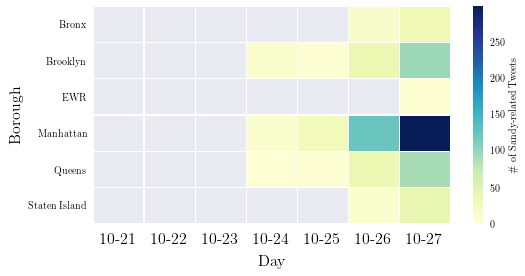

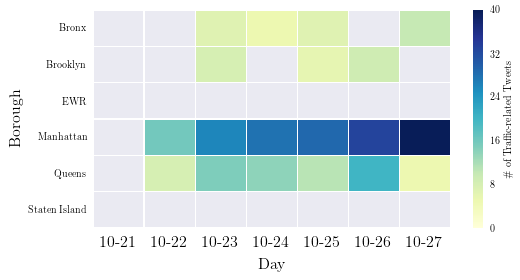

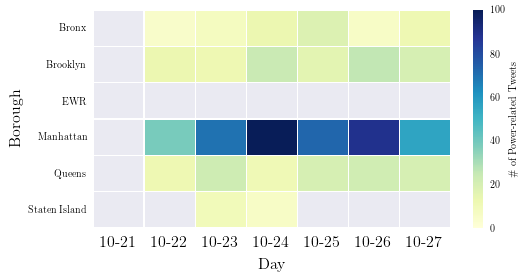

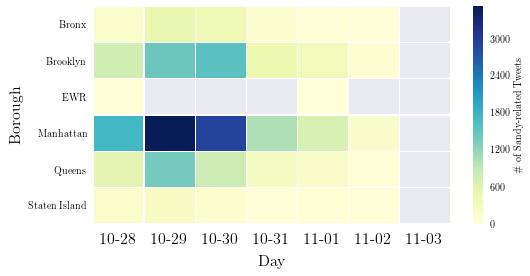

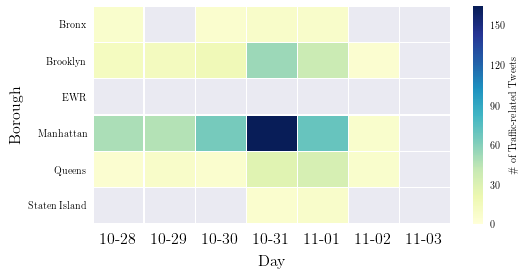

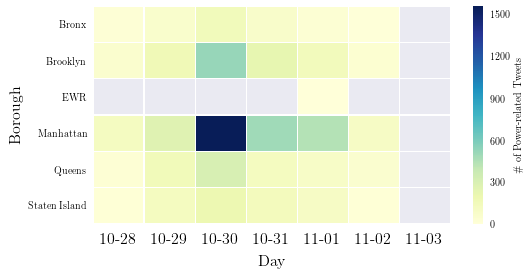

In [13]:
tweet_count_filter = 5
boroughs = ['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island']

# get data for week 1 ##############################
# startdate = pd.Timestamp('2012-10-21 00:00:00', 
#                          tz='America/New_York')  # inclusive
# enddate = pd.Timestamp('2012-10-29 00:00:00', 
#                        tz='America/New_York')  # exclusive
# df_sandy = ts.query_correlation_groupby('tweets_sandy', 'borough', 'date',
#                                         tweet_count_filter, 
#                                         startdate=startdate, enddate=enddate,
#                                         verbose=2)
# df_sandy = df_sandy.rename(columns={'tweets': 'sandy-tweets'})
# startdate = dt.datetime(2012, 10, 21, 0, 0, 0)
# enddate = dt.datetime(2012, 10, 28, 0, 0, 0)
# query = {
#     "count": {"$gte": tweet_count_filter},
#     "datetimeUTC": {"$lt": enddate, "$gte": startdate}
# }
# df_sandy = ts.mongod_to_df(query, collection='borough_day_sandy') 
# df_traffic = ts.mongod_to_df(query, collection='borough_day_traffic')
# df_power = ts.mongod_to_df(query, collection='borough_day_power')

# process data
daterange = ['10/21/2012', '10/27/2012']
df1, _ = ts.process_heat_map_daily(df_sandy, daterange=daterange, 
                                   boroughs=boroughs, verbose=1)
df2, _ = ts.process_heat_map_daily(df_traffic, daterange=daterange, 
                                   boroughs=boroughs, verbose=1)
df3, _ = ts.process_heat_map_daily(df_power, daterange=daterange, 
                                   boroughs=boroughs, verbose=1)

# heat map for Sandy-related tweets
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig, ax = plt.subplots(figsize=(8, 4), tight_layout=False)
ax = sns.heatmap(df1, vmin=0, cmap="YlGnBu", ax=ax, 
                 linewidths=0.25, yticklabels=True, 
                 cbar_kws={'label': '\# of Sandy-related Tweets'})
ax.tick_params(axis='both', colors='k')
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelrotation=0, labelsize=10)
ax.set_xlabel('Day', color='k', size=16)
ax.set_ylabel('Borough', color='k', size=16)
cbar_axes = ax.figure.axes[-1]
cbar_axes.yaxis.label.set_size(10)
cbar_axes.yaxis.label.set_color('k')
cbar_axes.tick_params(axis='y', colors='k')
# plt.savefig('notebooks/images/week1-sandytweets.pdf', dpi=300, 
#             bbox_inches='tight')
# plt.savefig('notebooks/images/week1-sandytweets.png', dpi=150, 
#             bbox_inches='tight')

# heat map for traffic-related tweets
fig, ax = plt.subplots(figsize=(8, 4), tight_layout=False)
ax = sns.heatmap(df2, vmin=0, cmap="YlGnBu", ax=ax, 
                 linewidths=0.25, cbar_kws={'label': 
                                            '\# of Traffic-related Tweets'})
ax.tick_params(axis='both', colors='k')
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelrotation=0, labelsize=10)
ax.set_xlabel('Day', color='k', size=16)
ax.set_ylabel('Borough', color='k', size=16)
cbar_axes = ax.figure.axes[-1]
cbar_axes.yaxis.label.set_size(10)
cbar_axes.yaxis.label.set_color('k')
cbar_axes.tick_params(axis='y', colors='k')
# plt.savefig('notebooks/images/week1-traffictweets.pdf', dpi=300, 
#             bbox_inches='tight')
# plt.savefig('notebooks/images/week1-traffictweets.png', dpi=150, 
#             bbox_inches='tight')

# heat map for power-related tweets
fig, ax = plt.subplots(figsize=(8, 4), tight_layout=False)
ax = sns.heatmap(df3, vmin=0, cmap="YlGnBu", ax=ax, 
                 linewidths=0.25, cbar_kws={'label': 
                                            '\# of Power-related Tweets'})
ax.tick_params(axis='both', colors='k')
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelrotation=0, labelsize=10)
ax.set_xlabel('Day', color='k', size=16)
ax.set_ylabel('Borough', color='k', size=16)
cbar_axes = ax.figure.axes[-1]
cbar_axes.yaxis.label.set_size(10)
cbar_axes.yaxis.label.set_color('k')
cbar_axes.tick_params(axis='y', colors='k')
# plt.savefig('notebooks/images/week1-powertweets.pdf', dpi=300, 
#             bbox_inches='tight')
# plt.savefig('notebooks/images/week1-powertweets.png', dpi=150, 
#             bbox_inches='tight')

# get data for week 2 ##############################
startdate = dt.datetime(2012, 10, 28, 0, 0, 0)
enddate = dt.datetime(2012, 11, 4, 0, 0, 0)
query = {
    "count": {"$gte": tweet_count_filter},
    "datetimeUTC": {"$lt": enddate, "$gte": startdate}
}
df_sandy = ts.mongod_to_df(query, collection='borough_day_sandy') 
df_traffic = ts.mongod_to_df(query, collection='borough_day_traffic')
df_power = ts.mongod_to_df(query, collection='borough_day_power')

# process data
daterange = ['10/28/2012', '11/03/2012']
df1, _ = ts.process_heat_map_daily(df_sandy, daterange=daterange, 
                                   boroughs=boroughs, verbose=1)
df2, _ = ts.process_heat_map_daily(df_traffic, daterange=daterange, 
                                   boroughs=boroughs, verbose=1)
df3, _ = ts.process_heat_map_daily(df_power, daterange=daterange, 
                                   boroughs=boroughs, verbose=1)

# heat map for Sandy-related tweets
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig, ax = plt.subplots(figsize=(8, 4), tight_layout=False)
ax = sns.heatmap(df1, vmin=0, cmap="YlGnBu", ax=ax, 
                 linewidths=0.25, yticklabels=True, 
                 cbar_kws={'label': '\# of Sandy-related Tweets'})
ax.tick_params(axis='both', colors='k')
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelrotation=0, labelsize=10)
ax.set_xlabel('Day', color='k', size=16)
ax.set_ylabel('Borough', color='k', size=16)
cbar_axes = ax.figure.axes[-1]
cbar_axes.yaxis.label.set_size(10)
cbar_axes.yaxis.label.set_color('k')
cbar_axes.tick_params(axis='y', colors='k')
# plt.savefig('notebooks/images/week2-sandytweets.pdf', dpi=300, 
#             bbox_inches='tight')
# plt.savefig('notebooks/images/week2-sandytweets.png', dpi=150, 
#             bbox_inches='tight')

# heat map for traffic-related tweets
fig, ax = plt.subplots(figsize=(8, 4), tight_layout=False)
ax = sns.heatmap(df2, vmin=0, cmap="YlGnBu", ax=ax, 
                 linewidths=0.25, cbar_kws={'label': 
                                            '\# of Traffic-related Tweets'})
ax.tick_params(axis='both', colors='k')
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelrotation=0, labelsize=10)
ax.set_xlabel('Day', color='k', size=16)
ax.set_ylabel('Borough', color='k', size=16)
cbar_axes = ax.figure.axes[-1]
cbar_axes.yaxis.label.set_size(10)
cbar_axes.yaxis.label.set_color('k')
cbar_axes.tick_params(axis='y', colors='k')
# plt.savefig('notebooks/images/week2-traffictweets.pdf', dpi=300, 
#             bbox_inches='tight')
# plt.savefig('notebooks/images/week2-traffictweets.png', dpi=150, 
#             bbox_inches='tight')

# heat map for power-related tweets
fig, ax = plt.subplots(figsize=(8, 4), tight_layout=False)
ax = sns.heatmap(df3, vmin=0, cmap="YlGnBu", ax=ax, 
                 linewidths=0.25, cbar_kws={'label': 
                                            '\# of Power-related Tweets'})
ax.tick_params(axis='both', colors='k')
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelrotation=0, labelsize=10)
ax.set_xlabel('Day', color='k', size=16)
ax.set_ylabel('Borough', color='k', size=16)
cbar_axes = ax.figure.axes[-1]
cbar_axes.yaxis.label.set_size(10)
cbar_axes.yaxis.label.set_color('k')
cbar_axes.tick_params(axis='y', colors='k')
# plt.savefig('notebooks/images/week2-powertweets.pdf', dpi=300, 
#             bbox_inches='tight')
# plt.savefig('notebooks/images/week2-powertweets.png', dpi=150, 
#             bbox_inches='tight')